# Start Project

### Step 0 - Define base of Project

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Step 1 - Add data to project

In [213]:
linkdin = pd.read_csv('country_migration_public.csv', header=0, sep=',')

#### Attributes of data

In [214]:
# linkdin.head()
# linkdin.shape
linkdin.info()
linkdin.describe()
# linkdin['base_country_wb_income'].unique()
# linkdin['base_country_wb_region'].unique()
# linkdin['target_country_wb_income'].unique()
# linkdin['target_country_wb_region'].unique()
linkdin['target_country_wb_income'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

High Income            2415
Upper Middle Income     895
Lower Middle Income     653
Low Income              185
Name: target_country_wb_income, dtype: int64

#### Histogram Chart of data

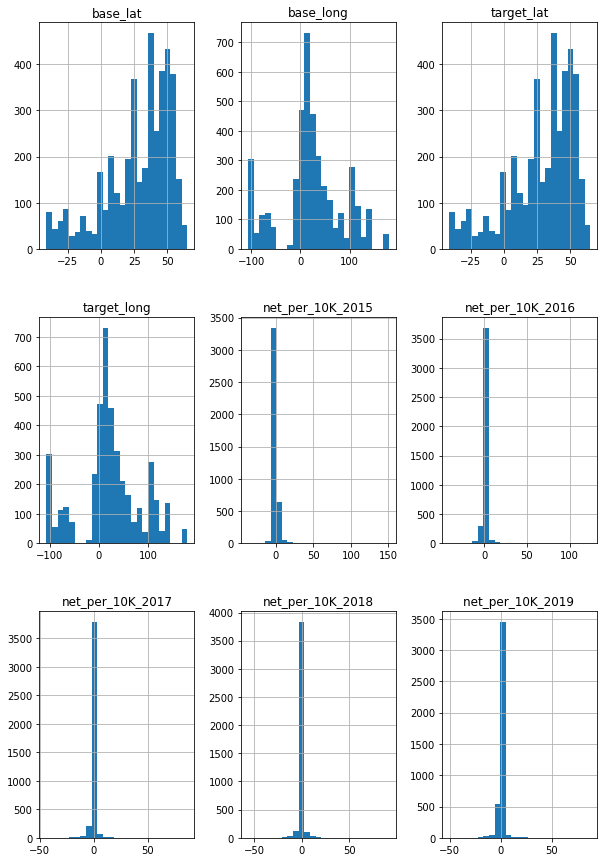

In [215]:
linkdin.hist(bins=25,figsize=(10,15))
plt.show()

#### Seprate test and train data

In [216]:
train_set,test_set=train_test_split(linkdin,test_size=0.2,random_state=100)
test_set.shape

(830, 17)

### Step 2 - Show data and charts

In [217]:
data=train_set.copy()
# data.plot(kind='scatter',x='target_lat',y='target_long',
#           s=data['net_per_10K_2015'],
# c=data['net_per_10K_2018'],cmap=plt.get_cmap('jet'),
# figsize=(10,7),alpha=0.5)

In [218]:
# standard corelation coefficient
corr_matrix=data.corr()
corr_matrix['net_per_10K_2015'].sort_values(ascending=False)


net_per_10K_2015     1.000000
net_per_10K_2016     0.922809
net_per_10K_2017     0.728606
net_per_10K_2018     0.674981
net_per_10K_2019     0.621520
target_lat           0.019678
base_long            0.018761
target_long         -0.074843
base_lat            -0.090094
Name: net_per_10K_2015, dtype: float64